# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [39]:
# Import libraries and scaling models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data set
try:
    ames_df = pd.read_csv("ames.csv")
except FileNotFoundError:
    print("The file 'ames.csv' doesn't exist or is not in the correct folder.")

### Data cleaning and preprocessing (if necessary)

In [3]:
ames_df.head(10)

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900
5,1998,1998,926,926,678,1604,2,1,3,1,7,1,470,195500
6,2001,2001,1338,1338,0,1338,2,0,2,1,6,0,582,213500
7,1992,1992,1280,1280,0,1280,2,0,2,1,5,0,506,191500
8,1995,1996,1595,1616,0,1616,2,0,2,1,5,1,608,236500
9,1999,1999,994,1028,776,1804,2,1,3,1,7,1,442,189000


In [4]:
# Shape of dataframe
print("Shape of dataframe:")
ames_df.shape

Shape of dataframe:


(2930, 14)

We have 2930 rows and 14 columns. First we get rid of duplicates

In [5]:
# Drop duplicates
ames_df = ames_df.drop_duplicates()
print("Shape of dataframe after dropping duplicates:")
ames_df.shape

Shape of dataframe after dropping duplicates:


(2923, 14)

The shape of the dataframe changes slightly from 2930 rows to 2923 rows, meaning at least 7 of the record were duplicates. Let's get a overview of the data.

In [6]:
# Overview of data
print("Overiew of information about dataset.")
ames_df.info()

Overiew of information about dataset.
<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2923 non-null   int64
 1   Year_Remod_Add  2923 non-null   int64
 2   Total_Bsmt_SF   2923 non-null   int64
 3   First_Flr_SF    2923 non-null   int64
 4   Second_Flr_SF   2923 non-null   int64
 5   Gr_Liv_Area     2923 non-null   int64
 6   Full_Bath       2923 non-null   int64
 7   Half_Bath       2923 non-null   int64
 8   Bedroom_AbvGr   2923 non-null   int64
 9   Kitchen_AbvGr   2923 non-null   int64
 10  TotRms_AbvGrd   2923 non-null   int64
 11  Fireplaces      2923 non-null   int64
 12  Garage_Area     2923 non-null   int64
 13  Sale_Price      2923 non-null   int64
dtypes: int64(14)
memory usage: 342.5 KB


 According to this, we are only dealing with integer columns and all the rows have entries.

In [7]:
# Check for missing values
print("Count of missing values:")
count_missing = ames_df.isnull().sum()
count_missing

Count of missing values:


Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

This confirms that there are no missing values.

In the dataset, we see that there are colums for the sizes of the first, second and basement floor, perhaps we would want to total square foot with all that combined.

In [8]:
# Create a column for total square foot
ames_df['Total_SF'] = (
    ames_df['Total_Bsmt_SF']
    + ames_df['First_Flr_SF']
    + ames_df['Second_Flr_SF']
)

ames_df.head(10)

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price,Total_SF
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000,2736
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000,1778
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000,2658
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000,4220
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900,2557
5,1998,1998,926,926,678,1604,2,1,3,1,7,1,470,195500,2530
6,2001,2001,1338,1338,0,1338,2,0,2,1,6,0,582,213500,2676
7,1992,1992,1280,1280,0,1280,2,0,2,1,5,0,506,191500,2560
8,1995,1996,1595,1616,0,1616,2,0,2,1,5,1,608,236500,3211
9,1999,1999,994,1028,776,1804,2,1,3,1,7,1,442,189000,2798


That we have everything we need for exploring the data, let's look at some relationships between the dependant variable (Sales_Price) and the rest of the variables.

### General exploratory data analysis

First, let's see how each feature correlates overall with the Sale_Price overall.

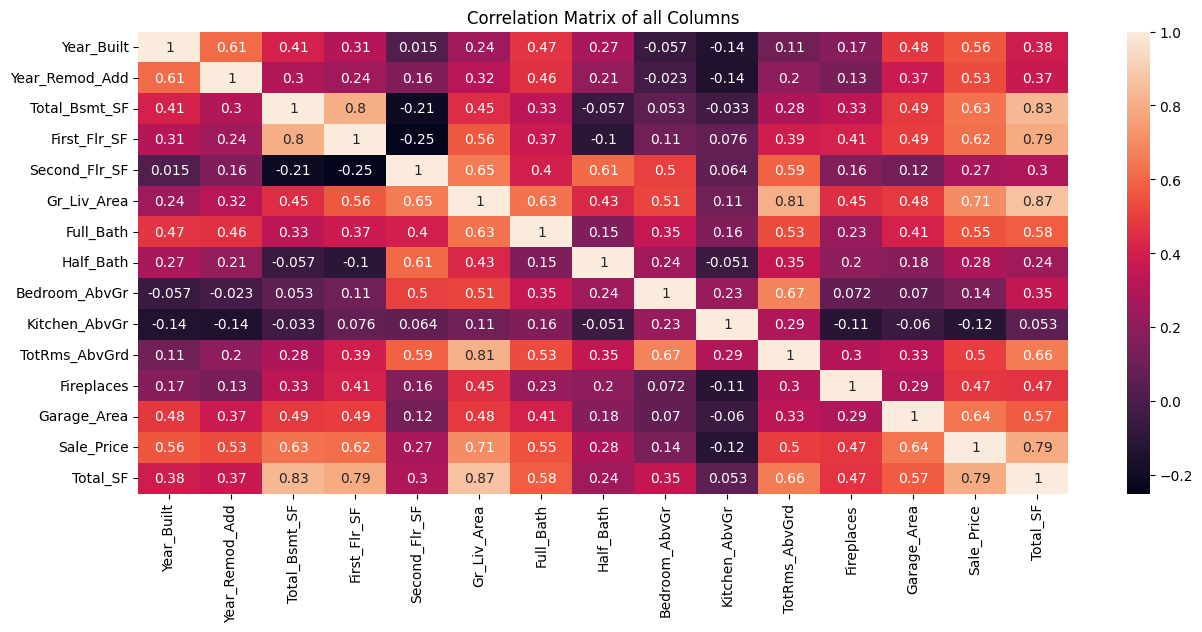

In [9]:
# First, get the correlation matrix
ames_cor_matrix = ames_df.corr()

# Plot matrix
plt.figure(figsize=(15, 6))
sns.heatmap(data=ames_cor_matrix, annot=True)
plt.title("Correlation Matrix of all Columns")
plt.show()

As indicated by the colour bar on the right, the columns that correlate with each other the best have a lighter colour. These are, for example, the SF (square foot) of the basement and first floor which have a correlation of 0.8. It is possible that the basements of most houses are more or less the same size as the first floor. 

Those with the least correlation between them are in dark purple colours. There is no correlation between the SF of the second floor and that of the basement SF as indicated by a -0,21 correlation. The same can be said between the second floor SF and the first floor SF. 

When focusing specifically on the sale price, some attributes are more strongly correlated to the price than others. Let’s single them out more.

In [11]:
# Correlation focussing on the Sale_Price
sale_price_cor = (
    ames_cor_matrix['Sale_Price']
    .sort_values(ascending=False)
)
print("Correlation of attributes with Sale_Price:")
sale_price_cor

Correlation of attributes with Sale_Price:


Sale_Price        1.000000
Total_SF          0.792794
Gr_Liv_Area       0.706794
Garage_Area       0.640081
Total_Bsmt_SF     0.632431
First_Flr_SF      0.622482
Year_Built        0.558543
Full_Bath         0.547808
Year_Remod_Add    0.532723
TotRms_AbvGrd     0.495578
Fireplaces        0.473524
Half_Bath         0.283451
Second_Flr_SF     0.267967
Bedroom_AbvGr     0.141882
Kitchen_AbvGr    -0.121915
Name: Sale_Price, dtype: float64

The following attributes are most strongly correlated to the price of the house: Total_SF, Gr_Liv_Area, Garage_Area, Total_Bsmt_SF, First_Flr_SF, Year_Built and Year_Remod_Add. They all have a correlation of more than 0.5. The rest all have a correlation of less than 0.5. There are weak/no correlations between the house price and Half_Bath, Second_Flr_SF, Bedroom_AbvGr and Kitchen_AbvGr. We will take a deeper look into these attributes and their relationships now. 

Let's take a look at how the house price changes based on year built.

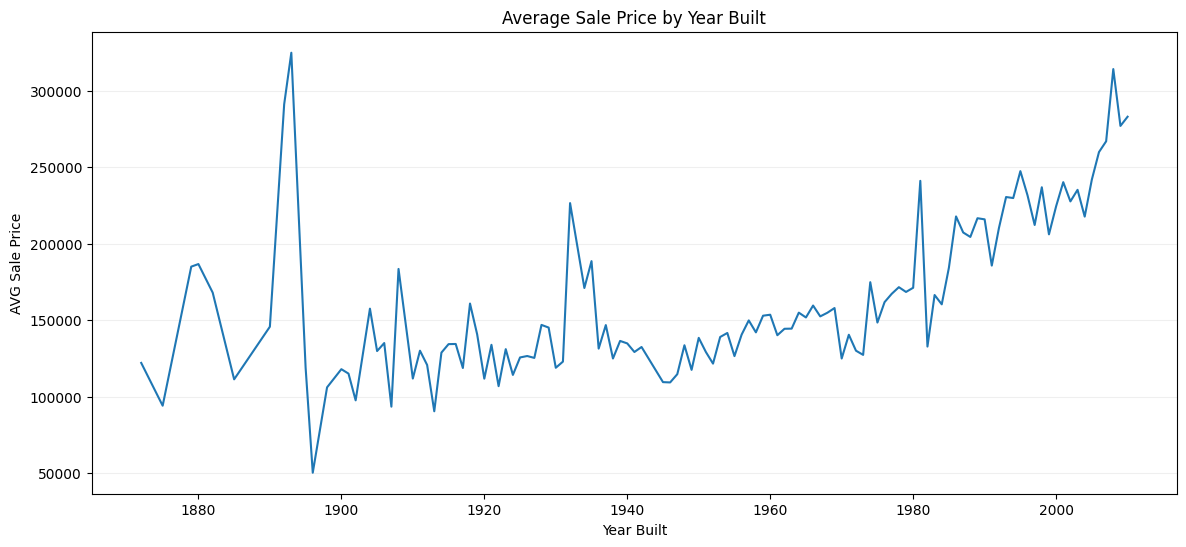

In [12]:
# Group data by year built and calculate average sale price
avg_yearly_prices = (
    ames_df.groupby('Year_Built')['Sale_Price']
    .mean()
    .reset_index()
)

# Plot on line graph
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=avg_yearly_prices, x='Year_Built', y='Sale_Price')

# Set grid behind bar
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Average Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('AVG Sale Price')

plt.show()

For houses built between the 1940s and 1980s, the sale prices were more stable, but there was still a gradual increase. For houses built after the 1980s, there is a steady increase in the sale prices especially for houses built more recently (year 2000+). This may be due to the newer houses having more modern features, up to date with the building code compliance so less maintenance is necessary, etc (source 1).

It is immediately clear that there was a large spike for houses built in the early years between 1880 and 1900. This could be due to high demand in housing because of population growth, urbanization, more land, central locations, etc (source 1). Another possibility could be that there were very few houses built in those years or very few recordings in this dataset which causes the average for those years to be very sensitive. The same could be said to the other relatively high spikes leading up to the 1940s. To see if this is in fact the case, let's look at the number of houses built per year for the first 30 years recorded next.


1. Source:
https://www.thezebra.com/resources/home/new-home-vs-old-home/

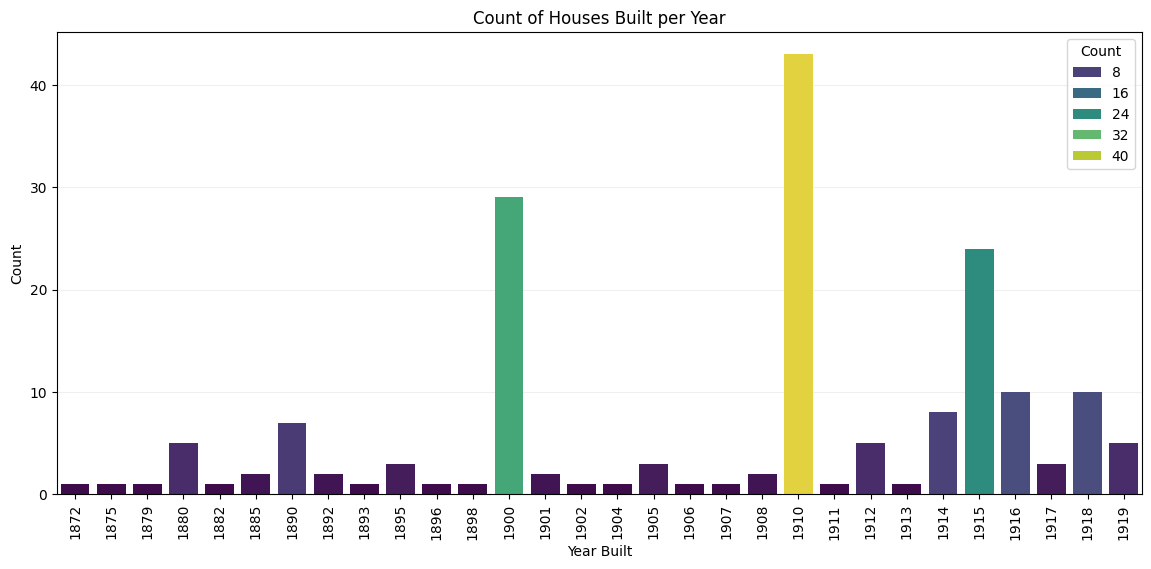

In [13]:
# Get a count of the numer of houses built per year
builds_per_year = (
    ames_df['Year_Built']
    .value_counts()
    .sort_index()
    .reset_index()
    .head(30)
)
builds_per_year.columns = ['Year_Built', 'Count']  # Rename columns

# Plot counts
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(
    data=builds_per_year,
    y='Count',
    x='Year_Built',
    hue='Count',
    palette='viridis'
)

# Set grid behind bar
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Count of Houses Built per Year')
plt.xlabel('Year Built')
plt.xticks(rotation=90)

plt.show()

Firstly, please note that the years are note evenly spaced as these are simply the years when there were houses built and some years there weren't any houses built which is why there are gaps between the years.

As expected, in the early years, not a lot of houses were built. In most of the years, only 1 house was built and for the rest, often less than 5 was built. The statistics and therefore the previous line plot for this year are then very sensitive to outliers and can then be the reason for the large spike. The years with the most houses built was in 1910 (approximately 43) followed by 1900 (approximately 29) and 1915 (approximately 24).

Next, let's look at the overall distribution of the Sale Price.

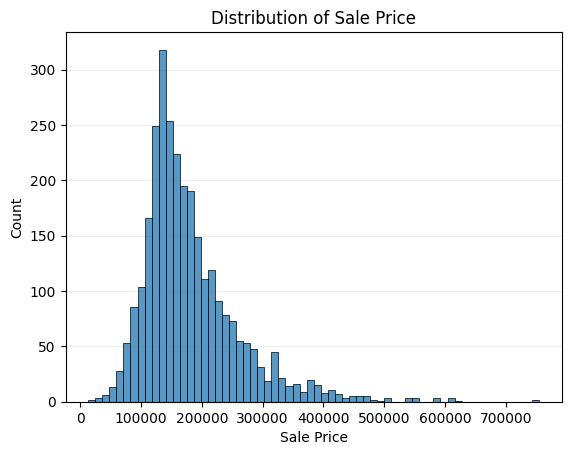

In [14]:
# Get sale data
sale_price_data = ames_df['Sale_Price']

# Plot data
fig, ax = plt.subplots()
sns.histplot(data=sale_price_data)

# Set grid behind bar
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')

plt.show()

The data for the Sale Price follow a right-skewed distribution. The majority of house prices are between 100k and 250k. There is a small number of very expensive house of over 500k and some even more than 700k. Let's take a look at what these extremely expensive homes might have to cause such high prices, but as seen earlier, some attributes are not correlated to the Sale Price or some are weakly correlation. We can filter our data to only include the columns there were strongly correlated to the Sale Price.

In [15]:
# Select houses over 500k
over_500k = (
    ames_df[ames_df['Sale_Price'] > 500000]
    .sort_values('Sale_Price', ascending=False)
)
filtered_over_500k = over_500k[
    [
        'Year_Built', 'Year_Remod_Add', 'Total_Bsmt_SF', 'First_Flr_SF',
        'Gr_Liv_Area', 'Garage_Area', 'Full_Bath', 'TotRms_AbvGrd',
        'Total_SF', 'Sale_Price'
    ]
]
filtered_over_500k

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Gr_Liv_Area,Garage_Area,Full_Bath,TotRms_AbvGrd,Total_SF,Sale_Price
1767,1994,1995,2444,2444,4316,832,3,10,6760,755000
1760,1996,1996,2396,2411,4476,813,3,10,6872,745000
2445,1995,1996,1930,1831,3627,807,3,10,5557,625000
1063,2003,2003,2535,2470,2470,789,1,7,5005,615000
44,2009,2010,2330,2364,2364,820,2,11,4694,611657
432,2007,2007,2630,2674,2674,762,2,8,5304,610000
1637,2006,2007,2660,2338,2338,1110,2,8,4998,591587
2450,1993,1994,1733,1933,3500,959,3,11,5233,584500
433,2008,2009,1734,1734,2822,1020,3,12,4556,582933
2332,2005,2006,1992,1992,2868,716,3,11,4860,556581


In [16]:
# Get descriptive statistics of above columns
print("Descriptive statistics of houses over 500k:")
filtered_over_500k.describe()

Descriptive statistics of houses over 500k:


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Gr_Liv_Area,Garage_Area,Full_Bath,TotRms_AbvGrd,Total_SF,Sale_Price
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2003.411765,2003.941176,2207.882353,2157.470588,2955.294118,877.882353,2.411765,9.705882,5163.176471,588493.294118
std,5.397439,5.320604,429.365066,340.422737,699.387121,157.497176,0.618347,1.611083,699.715499,71323.875183
min,1993.000000,1994.000000,1528.000000,1528.000000,2234.000000,672.000000,1.000000,7.000000,4450.000000,500067.000000
25%,2003.000000,2003.000000,1850.000000,1850.000000,2402.000000,762.000000,2.000000,8.000000,4694.000000,545224.000000
50%,2006.000000,2006.000000,2320.000000,2290.000000,2698.000000,820.000000,2.000000,10.000000,4984.000000,582933.000000
75%,2007.000000,2007.000000,2492.000000,2411.000000,3390.000000,959.000000,3.000000,11.000000,5304.000000,611657.000000
max,2009.000000,2010.000000,3094.000000,2674.000000,4476.000000,1174.000000,3.000000,12.000000,6872.000000,755000.000000


All these houses were built after 1980 which is, as was indicated earlier, when the sale prices started increasing. Most of them were built after the year 2000. This confirms that the modern houses are more prominent in the high-end market due to modernization, etc.
The living area (Gr_Liv_Area) is very large, often more than 2500 SF. The same can be said about the total SF (that includes the basement size as well) which is often more than 5000 SF. Most of these houses have 3 full bathrooms and more than 10 rooms above grade. All these measurements tell us that these are some large and luxuriously equipped houses. Let's look at how the size of these houses compare to the houses below 500k.

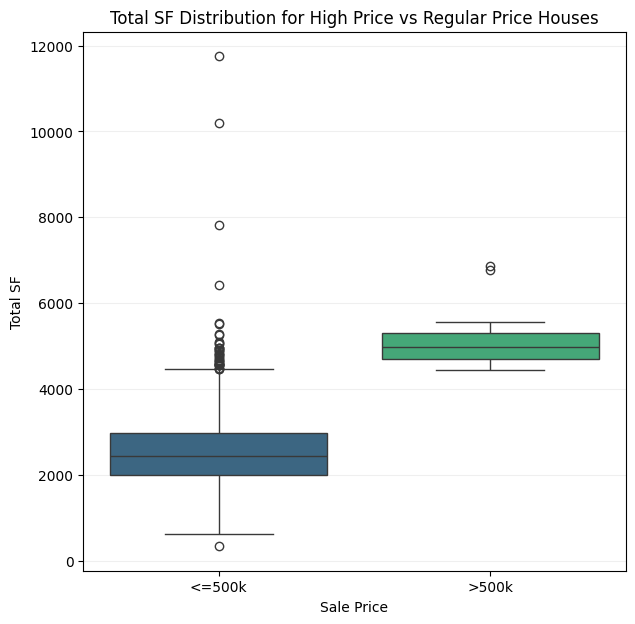

In [17]:
# Create new column marking houses above or below 500k as true or false
ames_df['Above_500k'] = ames_df['Sale_Price'] > 500000

# Plot the 2 newly created categories
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(
    data=ames_df,
    x='Above_500k',
    y='Total_SF',
    hue='Above_500k',
    palette='viridis',
    legend=False
)

# Set grid behind bar
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Total SF Distribution for High Price vs Regular Price Houses')
plt.xlabel('Sale Price')
plt.xticks([0, 1], ['<=500k', '>500k'])
plt.ylabel('Total SF')

plt.show()

For the less houses below 500k, the median is approximately 2500 SF while the median for the houses above 500k is approximately 5000 SF. The houses below 500k have wide spread in values with quite a few outliers. Some of these homes are very large but was sold for less than 500k. This can be due to many reasons including location, condition or year built. The house above 500k have a smaller more compact spread. There are some outliers with a total SF of more than 6000 SF.

Next, let's take a look at the impact of some discrete values (such as number of bathrooms, number of bedrooms, etc) on the sale price.

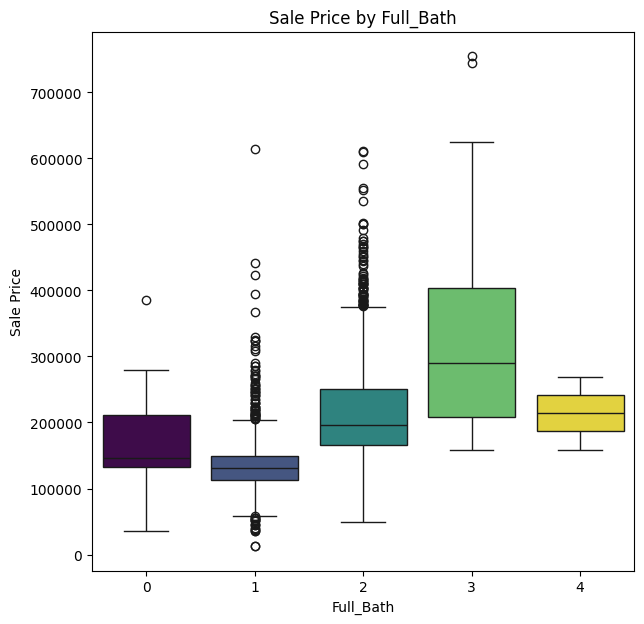

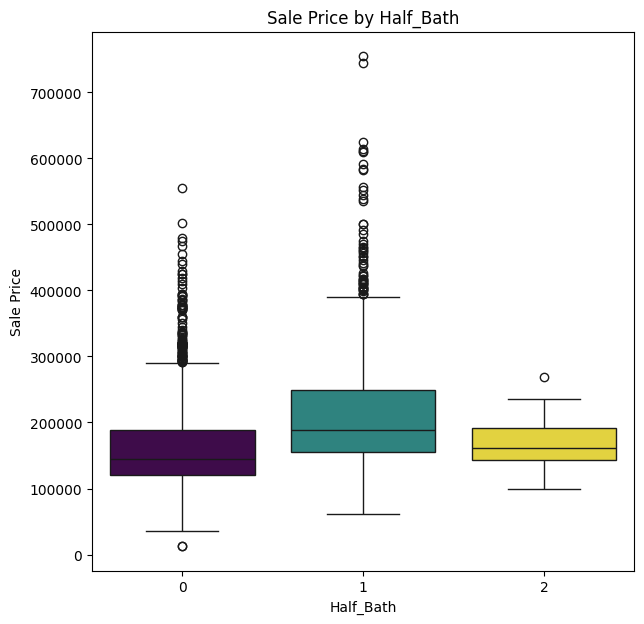

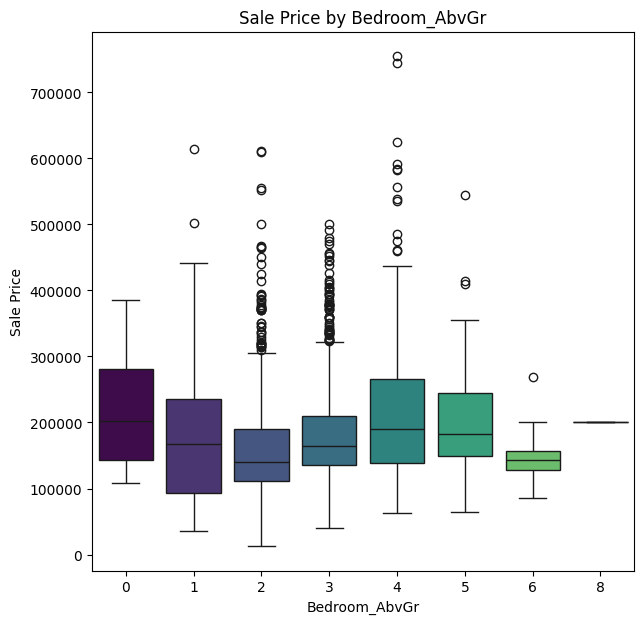

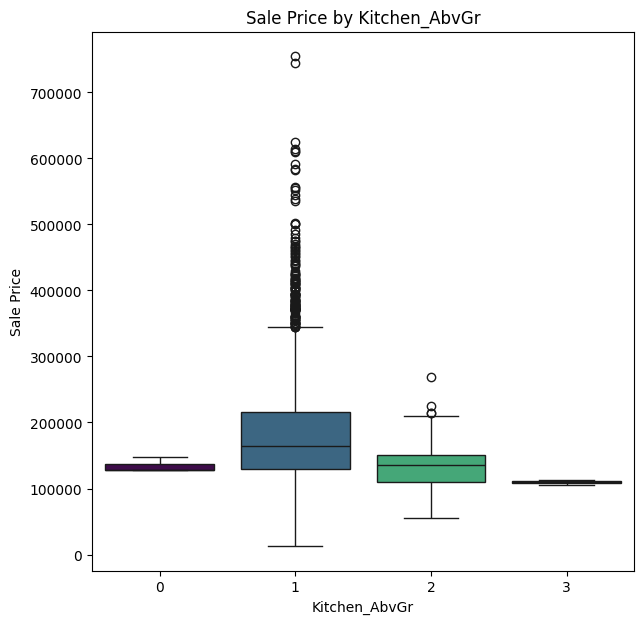

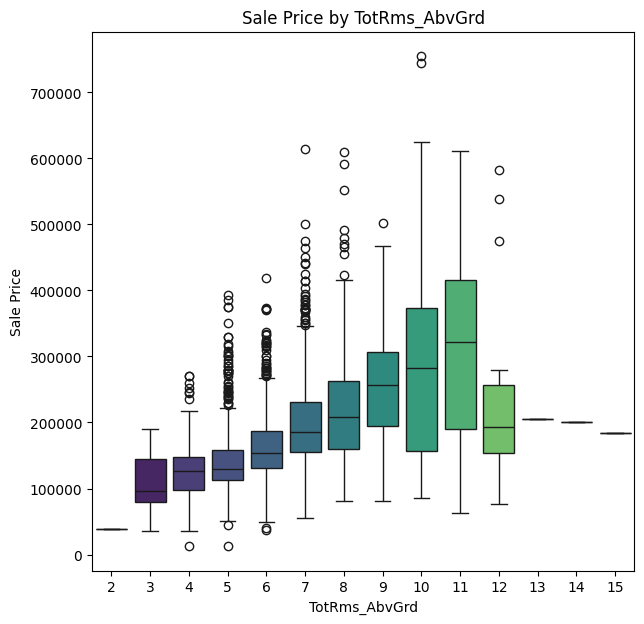

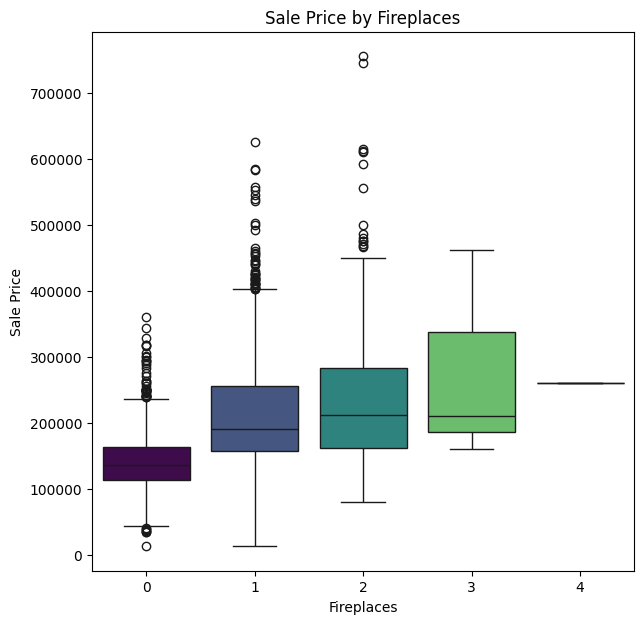

In [18]:
# Select the columns
discr_columns = [
    'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
    'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces'
]

for col in discr_columns:
    plt.figure(figsize=(7, 7))
    sns.boxplot(
        x=ames_df[col],
        y=ames_df['Sale_Price'],
        hue=ames_df[col],
        palette='viridis',
        legend=False
    )
    plt.title(f"Sale Price by {col}")
    plt.ylabel('Sale Price')
    plt.show()

Finding from the above box plots are as follows:

Increasing the number of full baths in a house does seem to increase the sale price of the house. The prices go up from 1 to 2 to 3 full baths but the decreases when it goes from 3 to four. Houses with 2 and 3 full baths are the most common with 3 full bath houses having the widest spread. There are some outliers where a house with no full baths are sold at almost 400k or houses with 1 or 2 full baths are sold for more than 500k. Houses with  one half bath have the widest spread in regards with half bath count, but according to the box plots, the median for all half baths are more or less on the same level (between 100k and 200k) which explains why we saw earlier that the half bath count is not as strongly correlated to the sale price as the full baths are.

As with the half bath count, the number of above grade bedrooms are also not strongly correlated to the sale price. This is evident from the spread of each box, the median prices for all are below 200k. The sale price does slightly increase from 2 to 3 to 4 bedrooms. There are some outliers especially in the 2–4-bedroom counts where the house prices are higher than the rest of the bedroom count.

The widest spread among above grade kitchen count is for houses that have only one kitchen. This is not unexpected as most houses usually only have one kitchen. Houses with no kitchens and 3 kitchens are in the minority of this dataset as they have almost no spread. The median for all these categories is between 100k and 200k. There are some outliers among houses with 1 and 2 kitchens where these houses were sold for more than 200k or even more than 700k. Overall this boxplot proves that the number of above grade kitchens is weakly correlated to sale price.

The sale price increases as the total number of rooms above ground increases especially as the total room count increases from 3 to 10 rooms. Houses with 10 and 11 rooms have the widest spread and the highest sale prices with at least 2 of the 10 room houses going for more than 700k. Houses with a total of 2, 13, 14 or 15 rooms have the least amount of spread and lower prices due to probably having the least amount of data entries and it is possible that more rooms could also mean smaller spaces. Other outliers here are, for example, houses with 7, 8, 12 rooms that sell for more almost 600k. Overall, total room count above grade is strongly correlated to sale price but not the primary predictor.

There is an increase in sale price as the number of fireplaces per house increase. The sale price, however, does not increase by a lot as the median sale price for all remain close to 200k. There are also some outliers where houses with 2 or 3 fire places are sold for more that 500k or even more than 600k. Since some houses with no fireplace also sells for more than 300k this would suggest that, even though there is a positive relationship between the number of fire places and sale price, these 2 variables are not strongly correlated.

Now let's take a look at the impact of some continuous values (such as SF, etc) on the sale price.

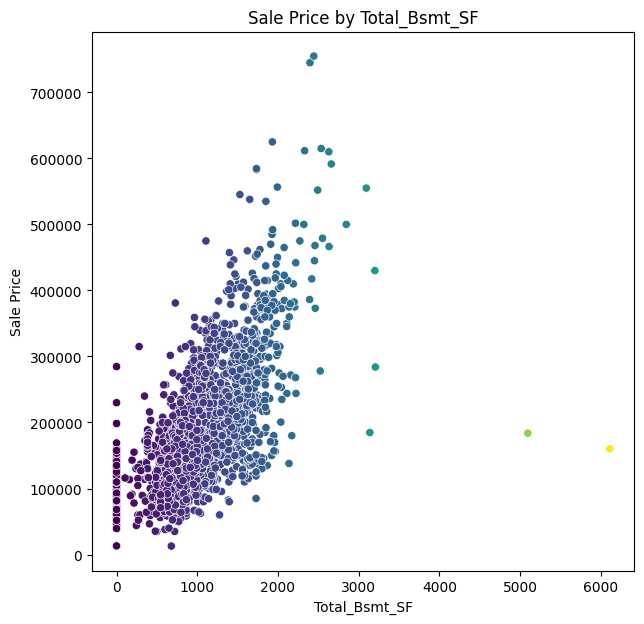

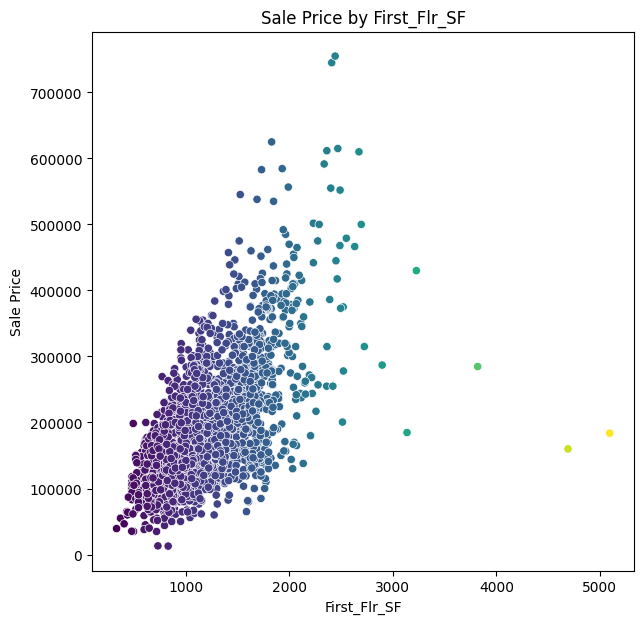

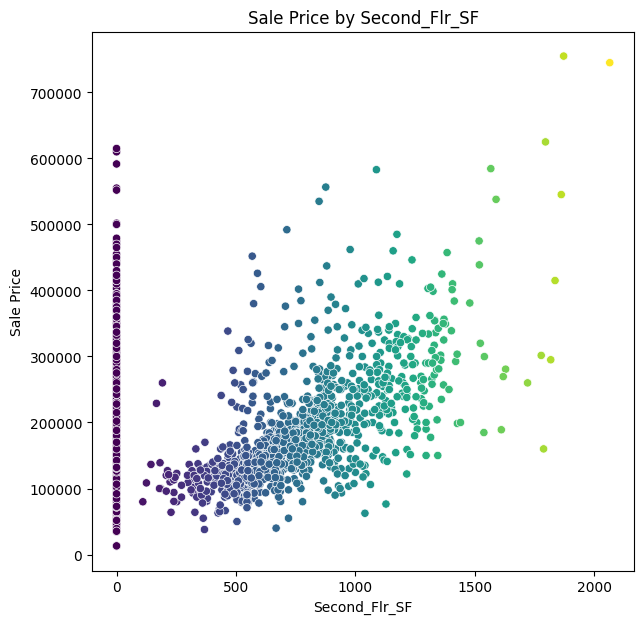

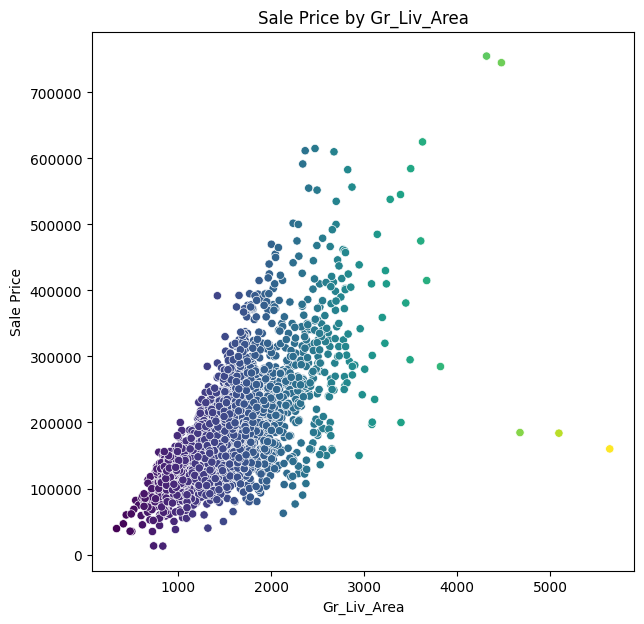

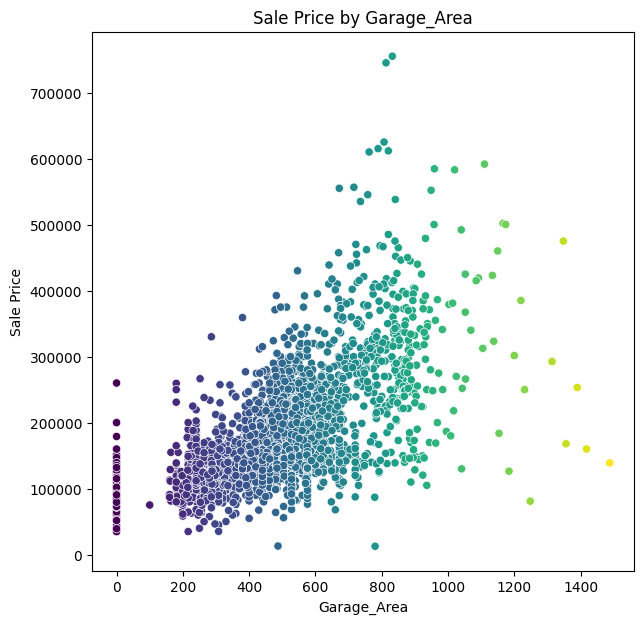

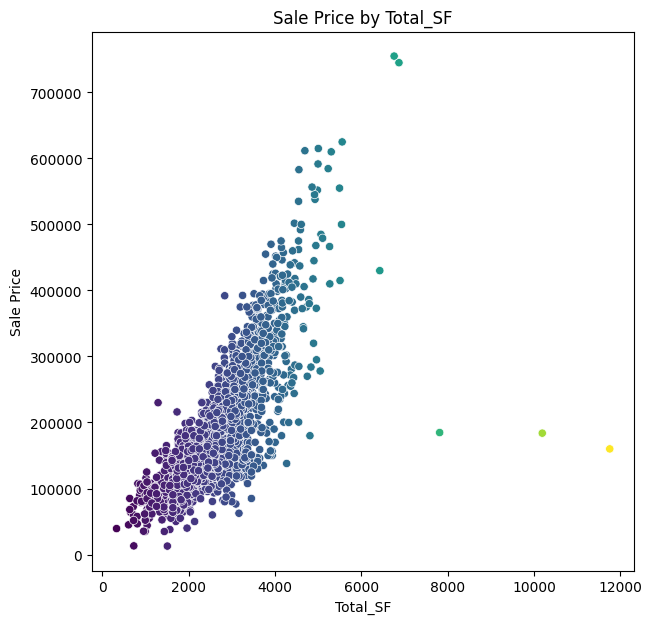

In [19]:
# Select the colums with continuous data
contin_columns = [
    'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF',
    'Gr_Liv_Area', 'Garage_Area', 'Total_SF'
]

# Plot each agains sale price
for col in contin_columns:
    plt.figure(figsize=(7, 7))
    sns.scatterplot(
        x=ames_df[col],
        y=ames_df['Sale_Price'],
        hue=ames_df[col],
        palette='viridis',
        legend=False
    )
    plt.title(f"Sale Price by {col}")
    plt.ylabel('Sale Price')
    plt.show()

Finding from the above scatter plots:

More basement space is associated with higher values. The majority of houses have a total basement space between 500 SF and 2000 SF and most houses have a sale price between 100k and 300k. There are a few outliers where the basement space is very large of more than 3000 SF but with very low sale prices of below 200k or houses with smaller basements but very high sale prices of more than 500k. Overall total basement size is a strong positive correlator to sale price.

There is also a strong coloration between first floor SF and sale price. As the size of the first-floor increases, so does the sale price. Some houses, however, have very large first floors (> 4000 SF), but have a sale price of below 200k and other have smaller first floors but with very high sale prices (>500k). The majority of houses have first floors with sizes approximately between 500 SF and 1700 SF and a sale price between 100k and 300k. Overall, first floor size is a strong, but not the only, predictor of sale price.

Second floor space has a much weaker correlation to sale price in comparison with basement SF and first floor SF. Many houses do not have a second floors, but still have very high prices. The majority of data points are clustered between 500 SF and 1000 SF with prices between 100k and 200k. There are some houses with large second floors (>1500 SF), but low sale prices and other houses have small second floors but high sale prices (>400k). Even though there is a general upwards trend, the second-floor size is not a strong predictor of the sale price.

The total above grade living area has a strong positive relationship with the sale price. This shows that the first-floor space combined with the second-floor space is a stronger predictor of the sale price than each of those factors on their own. There are some outliers where houses have large total living areas of more than 4000 SF but have a sale price of approximately 200k and other houses with sale prices of more than 500k but total living areas between 2000 SF and 3000 SF. The majority of houses have living areas between 1000 SF and 2000 SF with prices ranges between 100k and 300k.

Garage area has a weaker correlation with sale price. Some houses do not have garages and most of then have sale prices between 50k and 160k. the majority of houses have garage sizes between 200 SF and 700 SF with sale prices between 100k and 280k. Some houses with large garages sell for less than 300k or even 200k and some houses with smaller garages sell for more than 500k. Even though there is a positive trend, it is not as strong as the relationships between sale price and living areas.

Lastly, there is a strong positive relationship between the sale price and total square foot which combines the basement, first floor and second floor indicating that all these features combined is a strong predictor of the sale price.

Now that we have looked at each feature's relationship with the sale price, let's get started with out linear regression model.

### Split dataset into independent variables and dependent variable

For this linear regression model, we will be using the following independent variables:
- Gr_Liv_Area: size of above grade living area in SF (first floor + second floor)
- Garage_Area: size of garage in SF
The independent variable will be: Sale_Price

In [20]:
# Assign independent variables to X
X = ames_df.loc[:, ['Gr_Liv_Area', 'Garage_Area']].values
X = X.reshape(-1, X.shape[1])  # Ensure correct shape
print("Shape of X:", X.shape)

# Assign independent variable to Y
Y = ames_df.loc[:, 'Sale_Price'].values
Y = Y.reshape(-1, 1)  # Ensure correct shape
print("Shape of Y:", Y.shape)

Shape of X: (2923, 2)
Shape of Y: (2923, 1)


Nou that each variable has been assigned, let's explore the relationships between them.

Text(0.5, 1.02, 'Relationships between Independent and Dependent Variables')

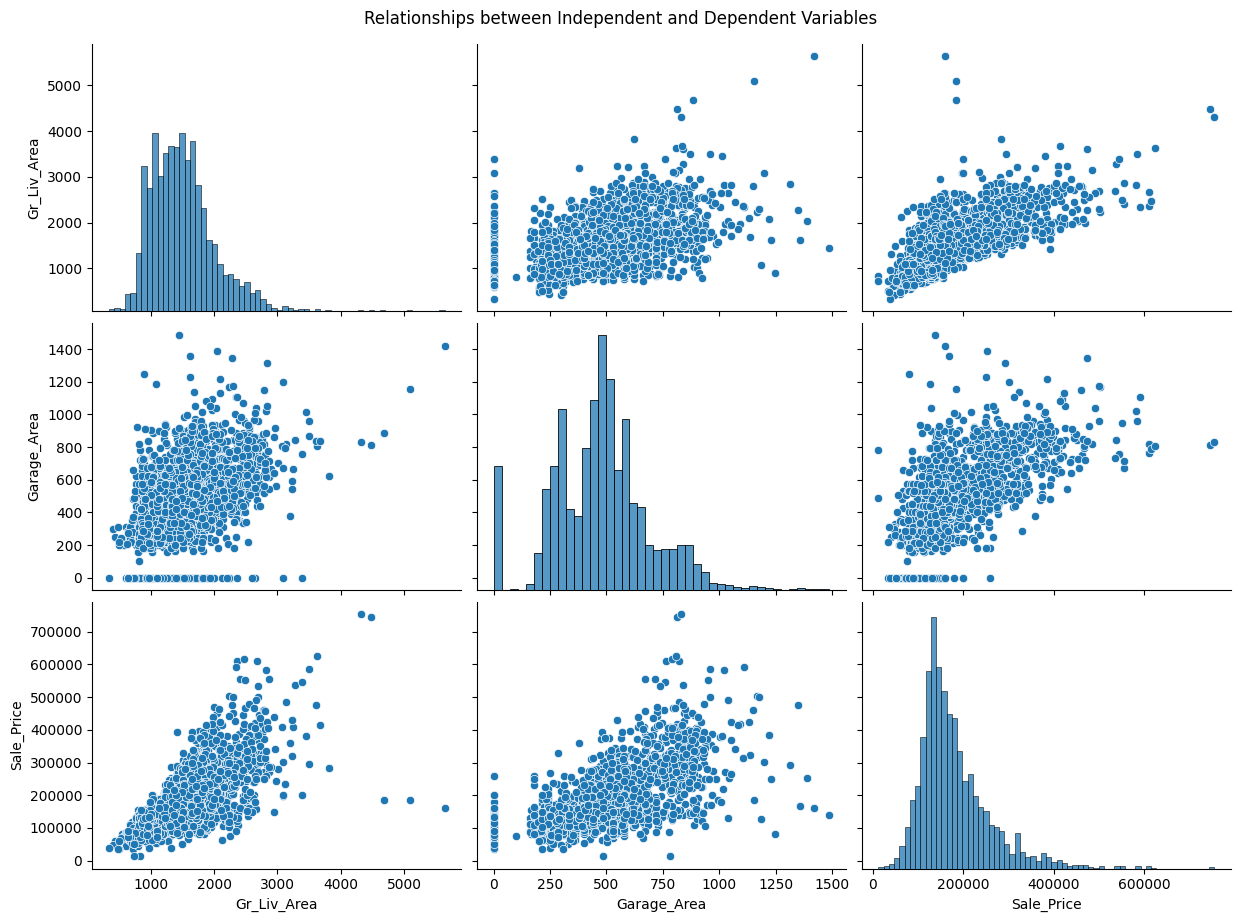

In [30]:
# Explore relationships between the independent and dependent variables
data_for_pair = ames_df.loc[:, ['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]
relations = sns.pairplot(data=data_for_pair, height=3, aspect=1.4)
relations.fig.suptitle(
    "Relationships between Independent and Dependent Variables", y=1.02
)

Findings from pairplpt:

As mentioned in more detail earlier, both of these independent variables have a positive relationship with the sale price: as they increase, the sale price increase. One, however, does have a stronger positive relationship with the sale price than the other.

Gr_Liv_Area is more strongly correlated with sale price than Garage_Area as indicated by the closer cluster of data points and what appears to look like a steeper upwards trend in the data. It is, therefore, also a strong predictor of sale price.

The spread for Garage_Area is wider than Gr_Liv_Area indicating a slightly weaker positive correlation and more variability in the impact of garage size on sale price.

The is also some correlatoin between Gr_Liv_Area and Garage_Area, but not strong enough to say that one can predict the other.
All the histograms follow a right-skewed distribution.

Next, let's split the data into training and test sets.

### Split data into training and test sets

We will use a 75:25 plit ratio for the training and test set.

In [31]:
# Create training and test set with 75:25 split ratio
ran_seed = 23  # Use same random set every time
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=ran_seed
)

print(
    f"Training X shape: {X_train.shape}. Testing X shape: {X_test.shape}."
)
print(
    f"Training Y shape: {Y_train.shape}. Testing Y shape: {Y_test.shape}."
)

Training X shape: (2192, 2). Testing X shape: (731, 2).
Training Y shape: (2192, 1). Testing Y shape: (731, 1).


Now that the data sets are in the required shapes, we can start creating the multiple linear regression model. Firts, let's do some feature scaling.

### Feature Scaling and Model Transformation

As seen above, the histograms for Gr_Liv_Area and Garage_Area do not follow a Gaussian distribution due to being rightly skewed which violates the rules of Gaussian distributions (source 1). They also don't completely follow the "bell-shaped" distribution specific to Gaussian distributions. Furthermore, they use continuous numerical features that have different scales. Because of this, normalization will be used as standardization is best for Gaussian distribution.

1. Source:
https://www.indeed.com/career-advice/career-development/skewed-distribution#:~:text=What%20is%20skewed%20distribution?,skews%20either%20negatively%20or%20positively.

In [51]:
# Initialize and fit Scaler on training set
scaler = MinMaxScaler()
scaler.fit(X_train)

# Apply scaler on training and tes set
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Initialize multiple linear regression model
mlrm = LinearRegression()

# Fit model to Y_train and scaled X_train
mlrm.fit(X_train_sc, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
# Print model intercept and coefficients
print("Model intercept:", mlrm.intercept_)
print("Model coefficients:", mlrm.coef_)

Model intercept: [14699.69566978]
Model coefficients: [[450918.27647652 212976.70701125]]


Since MinMaxScaler is used, the intercept here represents the predicted sale price when both independent variables are zero. In this case it is would be approximately ~14,699. According to the coefficients, the Gr_Liv_Area variable has a larger impact on Sale Price than the Garage_Area as indicated by the higher coefficient.

In [53]:
# Generate predictions for test set
Y_pred = mlrm.predict(X_test_sc)

Next, let's evaluate the performance of the model.

### Model Evaluation

In [54]:
# Calculate mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2215882916.959368
Root Mean Squared Error: 47073.16557189848


According to the RMSE which is in the same units as the target variable, the model's predictions are off by approximately 47k.

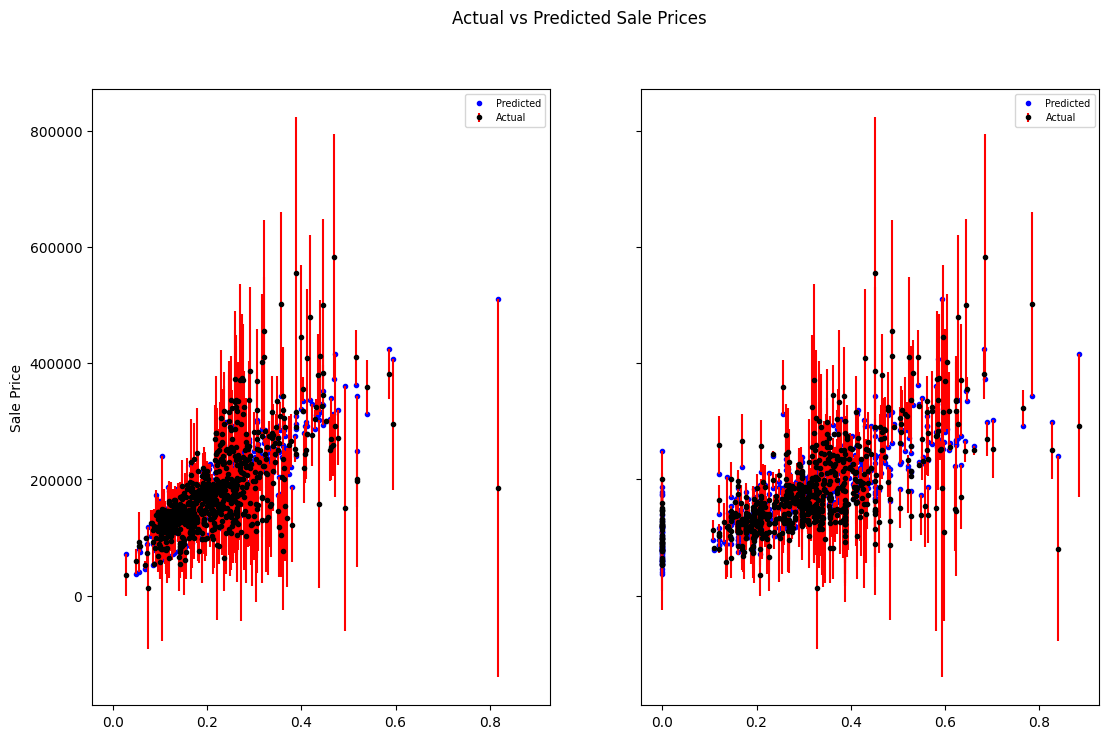

In [59]:
# Calculate difference between predicted and actual values
error_values = np.abs((Y_test-Y_pred)[:, 0])

# Plot actual and predicted values
fig, ax = plt.subplots(
    1, X_test_sc.shape[1], sharex=True, sharey=True, figsize=(13, 8)
)
for i in range(X_test_sc.shape[1]):
    ax[i].errorbar(
        X_test_sc[:, i],
        Y_test[:, 0],
        yerr=error_values,
        fmt='.k',
        ecolor='red',
        label='Actual'
    )
    ax[i].scatter(
        X_test_sc[:, i],
        Y_pred[:, 0],
        marker='.',
        c='b',
        label='Predicted'
    )
    ax[i].legend(loc='best', fontsize='x-small')

# Labels
fig.suptitle('Actual vs Predicted Sale Prices')
ax[0].set_ylabel('Sale Price')

plt.show()

Errorbars (red lines) closer to the left are smaller/shorter as this is where the clusters were on our previous plots. The longer errorbars are associated with outliers such as the houses that had large living areas or large garage spaces but with lower prices or the houses with smaller spaces but higher prices. These longer errorbars indicate bigger prediction mistakes.
This would mean that as the error gets bigger, the predictions are less accurate.

In [60]:
# Print model coefficients
print("Model coefficients:", mlrm.coef_)

Model coefficients: [[450918.27647652 212976.70701125]]


**Interpretation of coefficients in the context of the prediction:**
As mentioned before, the Gr_Liv_Area has a larger and stronger positive impact on the sale price in comparison with the Garage Area. This is indicated by Gr_Liv_Area having a higher coefficient of ~450,918 compared to ~212,976 for Garage_Area. This would mean that an increase from smallest to largest living area of garage size would lead to an increase in price of about 450,918 and 212,976 respectively.

### Conclusion

To conclude, in this dataset, attributes that were strongly correlated (>0.5) to the price of the house were: total_SF, Gr_Liv_Area, Garage_Area, Total_Bsmt_SF, First_Flr_SF, Year_Built and Year_Remod_Add. The rest had weak to no relationship with the price.

Houses built between the 1940s and 1980s had more stable prices with gradual increase as the year increases. The prices kept increasing after the 19802 and especially started spiking in the more recent years (2000+) due to modernization, etc. There were large spikes in the very early years between 1880 and 1900 and it was proven that this was the result of a low number of entries in the dataset for those years.

The majority of houses priced between 100k and 250k with a small number of extremely expensive houses priced over 500k and even over 700k. It was found that these expensive houses were built recently, had large living and garage areas, mostly 3 full baths and mostly more than 10 rooms above grade. The median SF of the expensive houses were proven much larger (~5000 SF) than that of the houses priced below 500k (2500 SF).

Among the discrete variables, it can be concluded that the number of full baths and number of rooms above grade were more strongly correlated with the sale price than the number of half baths, number of kitchens above grade and number of fireplaces. As the number of full baths increased, so did the sale price and as the number of above grade rooms increase, so did the sale prices. There were still some outliers where, for example, houses with only 1 full bath were priced for above 600k or houses with >12 rooms had a lower median sale price and some house with 7 room were priced higher.

Among the continuous variables, it can be concluded that the size of the basement, first floor and total above grade living space (first floor and second floor combined) and also the total living space had the strongest positive correlations with the sale price. Overall, an increase in space also resulted in an increase in sale price. There were some exceptions where houses priced lower than average were extremely larges houses or houses that were smaller were priced over 500k.

Between Gr_Liv_Area and Garage_Area (independent variable), Gr_Liv_Area had a stronger positive relationship with sale price (dependent variable) with a coefficient of 450918.27647652 compared to 212976.70701125 of Garage_Area. This indicates that an.  increase from smallest to largest living area of garage size would lead to an increase in price of about 450,918 and 212,976 respectively. Furthermore, the model had a RMSE of 47073.16557189848 which means that the predictions were off by ~47k.

This analysis clearly indicates that the price of a house is most strongly influenced by continuous variable such as the size of certain spaces and in addition to this, the year the house was built also contributed to the price. Larger houses that were built recently are generally priced higher.

Overall, this was a data-driven analysis that improved our understanding of what factors into the sale price of a house.